In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def omabd(x: list, tdd:float) -> list:
    """
    Input: 
        1) x: Dataset D representado por x[0..m][0..n], 
            onde x[i][j] é o j-ésimo atributo do i-ésimo objeto
        2) tdd: Limiar de dissimilaridade
    
    Retorno:
        Índices dos outliers
    """

    # Passo 1: Obter Xmaxf, Xminf e Xf de cada atributo 
    m = len(x)
    n = len(x[0])

    xmaxf = [0 for _ in range(n)]
    xminf = [0 for _ in range(n)]
    xf    = [0 for _ in range(n)]

    for i in range(n):
        xmaxf[i] = x[0][i]
        xminf[i] = x[0][i]
        xf[i] = x[0][i]

        for j in range(1, m):
            if x[j][i] > xmaxf[i]: xmaxf[i] = x[j][i]
            if x[j][i] < xminf[i]: xminf[i] = x[j][i]
            xf[i] += x[j][i]
        
        xf[i] /= m

    # Passo 2: Computar a matriz dm e dmax
    dmax = 0.0
    sd = [0 for _ in range(m)]
    od = [[0 for _ in range(m)] for _ in range(m)] 
    
    for i in range(m):
        for j in range(m):
            for k in range(n):
                temp = abs(abs(x[i][k]-xf[k]) - abs(x[j][k]-xf[k]))
                od[i][j] += (temp*temp) / (xmaxf[k]-xminf[k])
            
            od[i][j] = od[i][j] / n
            sd[i] += od[i][j]
            
            if dmax < sd[i]: dmax=sd[i]
    
    # Passo 3: Detectando outliers usando o tdd
    outliers = []
    for i in range(m):
        dd = (dmax - sd[i]) / dmax
        if dd < tdd: outliers.append(i)

    return outliers


In [17]:
def omabd_numpy(x:np.array, tdd:float) -> list:
    """
    Input: 
        1) x: Dataset D representado por x[1..m][1..n], onde x[i][j] é o j-ésimo atributo do i-ésimo objeto
        2) tdd: Limiar de dissimilaridade
    
    Retorno:
        Índices dos outliers
    """

    m, n = x.shape

    # Passo 1: Obter Xmaxf, Xminf e Xf de cada atributo 
    xmaxf = np.max(x, axis=0)
    xminf = np.min(x, axis=0)
    xf = np.mean(x, axis=0)

    # Passo 2: Computar a matriz dm e dmax
    dmax = 0.0
    sd = np.zeros(shape=(m))
    od = np.zeros(shape=(m, m))
    
    for i in range(m):
        for j in range(m):
            for k in range(n):
                temp = abs(abs(x[i][k]-xf[k]) - abs(x[j][k]-xf[k]))
                od[i][j] += (temp*temp) / (xmaxf[k]-xminf[k])
            
            od[i][j] = od[i][j] / n
            sd[i] += od[i][j]
            
            if(dmax<sd[i]): dmax=sd[i]
    
    # Passo 3: Detectando outliers usando o tdd
    outliers = []
    for i in range(m):
        dd = (dmax - sd[i]) / dmax
        if dd < tdd: outliers.append(i)

    return outliers

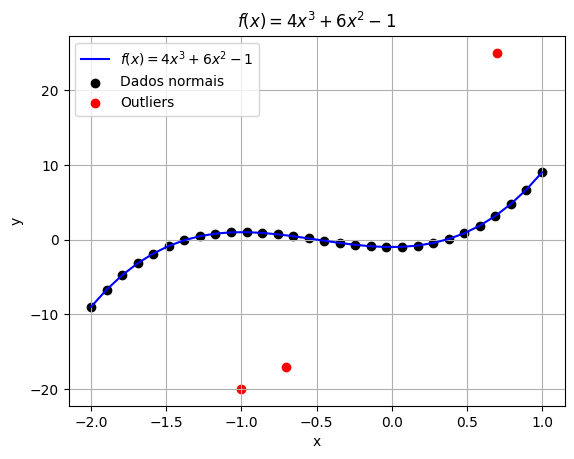

In [ ]:
# Definindo a função polinomial
coefficients = [4, 6, 0, -1]
polynomial = np.poly1d(coefficients)

# Gerando os valores de X e Y
x = np.linspace(-2, 1, 30)
y = polynomial(x)

x = x.tolist()
y = y.tolist()

# Gerando outliers arbitrários
outliers = [
    (-1.0, -20.0),
    (-0.7, -17.0),
    (0.7, 25.0)
]

D = list(zip(x, y)) + outliers
D = sorted(D, key=lambda x: x[0])

# Plot
plt.plot(x, y, label=r'$f(x) = 4x^3 + 6x^2 - 1$', color='blue')
plt.scatter(x, y, color = "black", label="Dados normais")
plt.scatter([x for x, _ in outliers], [y for _, y in outliers], color = "red", label="Outliers")
plt.xlabel("x")
plt.ylabel("y")
plt.title('$f(x) = 4x^3 + 6x^2 - 1$')
plt.grid(True)
plt.legend()
plt.savefig('foo.png')
plt.show()

In [19]:
indexes = omabd(D, tdd=0.6)
print(f"outliers: {indexes}")
for i in indexes:
    print(D[i])

outliers: [10, 14, 29]
(-1.0, -20.0)
(-0.7, -17.0)
(0.7, 25.0)


In [14]:
tdd = 0.6
indexes = omabd(D, tdd)
print(f"outliers: {indexes}")

indexes = omabd_numpy(np.array(D), tdd)
print(f"outliers: {indexes}")



184.99732987848213
outliers: [10, 14, 29]
184.99732987848213
outliers: [10, 14, 29]
